In [ ]:
import os
import glob
import json
import pandas as pd
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Configure paths
input_path = '/content/drive/MyDrive/m.tech_cv_project/data/*.json'
output_folder = '/content/drive/MyDrive/m.tech_cv_project/processed_chunks'

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Step 3: Get all JSON files
all_files = sorted(glob.glob(input_path))
chunk_size = 100

# Step 4: Process files in chunks
for chunk_start in range(0, len(all_files), chunk_size):
    chunk_end = chunk_start + chunk_size
    chunk_files = all_files[chunk_start:chunk_end]
    chunk_data = []

    print(f"Processing files {chunk_start} to {chunk_end}...")

    for file in chunk_files:
        with open(file, 'r', encoding='utf-8') as f:
            content = json.load(f)
            for playlist in content['playlists']:
                for track in playlist['tracks']:
                    chunk_data.append({
                        "playlist_id": playlist['pid'],
                        "playlist_name": playlist['name'],
                        "track_pos": track['pos'],
                        "track_uri": track['track_uri'],
                        "track_name": track['track_name'],
                        "artist_name": track['artist_name'],
                        "album_name": track['album_name'],
                        "duration_ms": track['duration_ms']
                    })

    # Step 5: Save this chunk to a CSV
    df_chunk = pd.DataFrame(chunk_data)
    output_file = os.path.join(output_folder, f'playlist_chunk_{chunk_start}_{chunk_end - 1}.csv')
    df_chunk.to_csv(output_file, index=False)
    print(f"Saved chunk to: {output_file}\n")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing files 0 to 100...
Saved chunk to: /content/drive/MyDrive/m.tech_cv_project/processed_chunks/playlist_chunk_0_99.csv

Processing files 100 to 200...
Saved chunk to: /content/drive/MyDrive/m.tech_cv_project/processed_chunks/playlist_chunk_100_199.csv



In [ ]:
df_chunk = pd.DataFrame(chunk_data)
output_file = os.path.join(output_folder, f'playlist_chunk_{chunk_start}_{chunk_end - 1}.csv')
df_chunk.to_csv(output_file, index=False)


In [ ]:
print(f"Saved chunk to: {output_file}\n")


Saved chunk to: /content/drive/MyDrive/m.tech_cv_project/processed_chunks/playlist_chunk_100_199.csv



In [ ]:
import pandas as pd
import glob

# Step 1: Define the folder where all your chunk CSVs are saved
csv_folder = '/content/drive/MyDrive/m.tech_cv_project/processed_chunks'

# Step 2: Use glob to find all chunk CSVs
csv_files = sorted(glob.glob(f'{csv_folder}/playlist_chunk_*.csv'))

# Step 3: Load and concatenate all CSVs
df_list = [pd.read_csv(file) for file in csv_files]
merged_df = pd.concat(df_list, ignore_index=True)

# Step 4: Optional - Save merged DataFrame to a new CSV
merged_csv_path = f'{csv_folder}/all_playlists_merged.csv'
merged_df.to_csv(merged_csv_path, index=False)

print(f"✅ Merged {len(csv_files)} files. Final shape: {merged_df.shape}")
print(f"📄 Merged CSV saved at: {merged_csv_path}")


✅ Merged 2 files. Final shape: (11125224, 8)
📄 Merged CSV saved at: /content/drive/MyDrive/m.tech_cv_project/processed_chunks/all_playlists_merged.csv


In [ ]:
merged_df.shape


(11125224, 8)

In [ ]:
import os
import glob
import json
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/m.tech_cv_project/processed_chunks/all_playlists_merged.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,playlist_id,playlist_name,track_pos,track_uri,track_name,artist_name,album_name,duration_ms
0,1000,disney,0,spotify:track:5IbCV9Icebx8rR6wAp5hhP,Fathoms Below - Broadway Cast Recording,Original Broadway Cast - The Little Mermaid,The Little Mermaid: Original Broadway Cast Rec...,154506
1,1000,disney,1,spotify:track:6rKVAvjHcxAzZ1BHtwh5yC,Daughters Of Triton - Broadway Cast Recording,Original Broadway Cast - The Little Mermaid,The Little Mermaid: Original Broadway Cast Rec...,79066
2,1000,disney,2,spotify:track:6Jlkb1Wh08RYHstWScsTvg,The World Above - Broadway Cast Recording,Original Broadway Cast - The Little Mermaid,The Little Mermaid: Original Broadway Cast Rec...,94600
3,1000,disney,3,spotify:track:0XhC8bfStML9ygBmfOt1JJ,Human Stuff - Broadway Cast Recording,Original Broadway Cast - The Little Mermaid,The Little Mermaid: Original Broadway Cast Rec...,151480
4,1000,disney,4,spotify:track:0ABxAcsRWlqckkyONsfP67,I Want the Good Times Back - Broadway Cast Rec...,Original Broadway Cast - The Little Mermaid,The Little Mermaid: Original Broadway Cast Rec...,297920


In [ ]:
df.shape

(11125224, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11125224 entries, 0 to 11125223
Data columns (total 8 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   playlist_id    int64 
 1   playlist_name  object
 2   track_pos      int64 
 3   track_uri      object
 4   track_name     object
 5   artist_name    object
 6   album_name     object
 7   duration_ms    int64 
dtypes: int64(3), object(5)
memory usage: 679.0+ MB


In [ ]:
missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100
print("Missing Values (%):\n", missing_percentage)


Missing Values (%):
 playlist_id      0.000000
playlist_name    0.001879
track_pos        0.000000
track_uri        0.000000
track_name       0.000297
artist_name      0.000027
album_name       0.000018
duration_ms      0.000000
dtype: float64


##Drop or Fill missing values

In [ ]:
df.dropna(inplace=True)  # OR use df = df.dropna()


##check missing values

In [ ]:
# Missing values summary
missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100
print("Missing Values (%):\n", missing_percentage)


Missing Values (%):
 playlist_id      0.0
playlist_name    0.0
track_pos        0.0
track_uri        0.0
track_name       0.0
artist_name      0.0
album_name       0.0
duration_ms      0.0
dtype: float64


##Remove Duplicate

In [ ]:
before = len(df)
df.drop_duplicates(inplace=True)
after = len(df)
print(f"✅ Removed {before - after} duplicate rows")


✅ Removed 0 duplicate rows


##Validate Data Types

In [ ]:
print(df.dtypes)


playlist_id       int64
playlist_name    object
track_pos         int64
track_uri        object
track_name       object
artist_name      object
album_name       object
duration_ms       int64
dtype: object


##Normalize/Standardize Text Columns

In [ ]:
text_cols = ['playlist_name', 'track_name', 'artist_name', 'album_name']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()


In [ ]:
# Convert duration to minutes for readability
df['duration_min'] = df['duration_ms'] / 60000

# Summary statistics
df['duration_min'].T.describe()


,duration_min
count,1.112498e+07
mean,3.917215e+00
std,1.271727e+00
min,0.000000e+00
25%,3.309700e+00
50%,3.753417e+00
75%,4.324283e+00
max,3.278676e+02


In [ ]:
# Top 10 most frequent artists
top_artists = df['artist_name'].value_counts().head(10)
print("Top 10 Artists:\n", top_artists)

# Top 10 most frequent tracks
top_tracks = df['track_name'].value_counts().head(10)
print("\nTop 10 Tracks:\n", top_tracks)


Top 10 Artists:
 artist_name
drake             143929
kanye west         70686
kendrick lamar     60263
rihanna            58102
the weeknd         53679
eminem             51992
ed sheeran         45151
future             42325
j. cole            41532
justin bieber      41134
Name: count, dtype: int64

Top 10 Tracks:
 track_name
closer                         11471
home                            8501
humble.                         8021
one dance                       7490
roses                           7437
congratulations                 7277
broccoli (feat. lil yachty)     7015
ride                            6810
let me love you                 6796
forever                         6410
Name: count, dtype: int64


In [ ]:
# Number of unique playlists
print("Unique Playlists:", df['playlist_id'].nunique())

# Average number of tracks per playlist
tracks_per_playlist = df.groupby('playlist_id')['track_uri'].count()
print("Average Tracks per Playlist:", tracks_per_playlist.mean())


Unique Playlists: 169997
Average Tracks per Playlist: 65.44219603875362


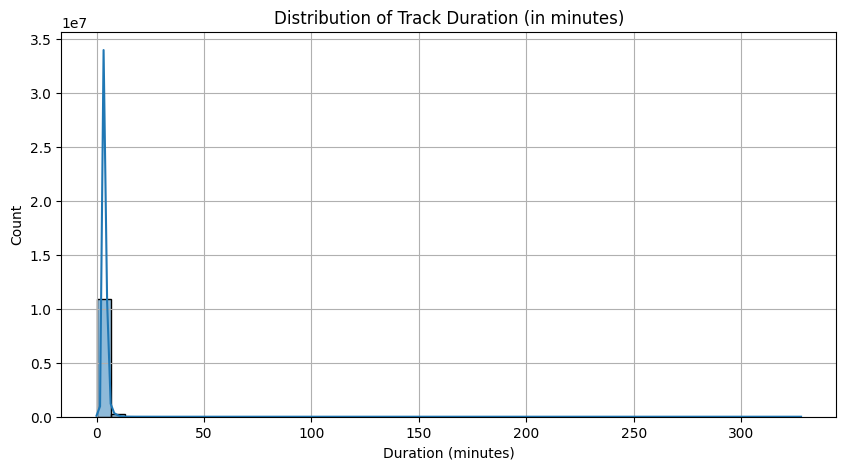

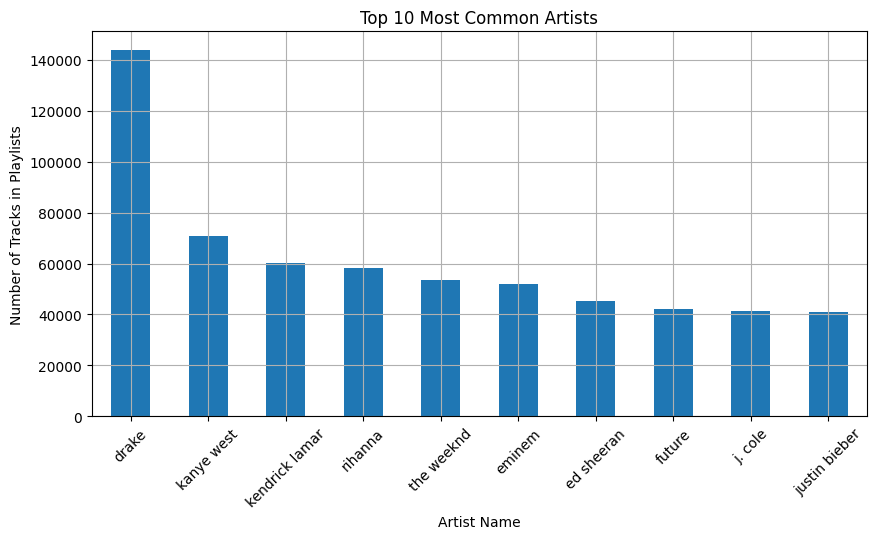

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of track durations
plt.figure(figsize=(10, 5))
sns.histplot(df['duration_min'], bins=50, kde=True)
plt.title('Distribution of Track Duration (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Top 10 artists barplot
plt.figure(figsize=(10, 5))
top_artists.plot(kind='bar')
plt.title('Top 10 Most Common Artists')
plt.xlabel('Artist Name')
plt.ylabel('Number of Tracks in Playlists')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
duplicates = df.duplicated().sum()


In [ ]:
df.describe(include='all')


,playlist_id,playlist_name,track_pos,track_uri,track_name,artist_name,album_name,duration_ms,duration_min
count,1.112498e+07,11124977,1.112498e+07,11124977,11124977,11124977,11124977,1.112498e+07,1.112498e+07
unique,NaN,18989,NaN,909666,615556,136255,273234,NaN,NaN
top,NaN,rap,NaN,spotify:track:7KXjTSCq5nL1LoYtL7XAwS,closer,drake,views,NaN,NaN
freq,NaN,135674,NaN,7999,11471,143929,35422,NaN,NaN
mean,2.496656e+05,NaN,5.381368e+01,NaN,NaN,NaN,NaN,2.350329e+05,3.917215e+00
std,7.342120e+04,NaN,4.796249e+01,NaN,NaN,NaN,NaN,7.630362e+04,1.271727e+00
min,1.000000e+03,NaN,0.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
25%,1.934390e+05,NaN,1.700000e+01,NaN,NaN,NaN,NaN,1.985820e+05,3.309700e+00
50%,2.519400e+05,NaN,3.900000e+01,NaN,NaN,NaN,NaN,2.252050e+05,3.753417e+00
75%,3.124270e+05,NaN,7.800000e+01,NaN,NaN,NaN,NaN,2.594570e+05,4.324283e+00


In [ ]:
df['duration_sec'] =df['duration_ms'] / 1000
df['duration_sec'].describe()


,duration_sec
count,1.112498e+07
mean,2.350329e+02
std,7.630362e+01
min,0.000000e+00
25%,1.985820e+02
50%,2.252050e+02
75%,2.594570e+02
max,1.967206e+04


In [ ]:
# Top 10 artists
print(df['artist_name'].value_counts().head(10))

# Top 10 albums
print(df['album_name'].value_counts().head(10))

# Top 10 tracks
print(df['track_name'].value_counts().head(10))


artist_name
drake             143929
kanye west         70686
kendrick lamar     60263
rihanna            58102
the weeknd         53679
eminem             51992
ed sheeran         45151
future             42325
j. cole            41532
justin bieber      41134
Name: count, dtype: int64
album_name
views                        35422
stoney                       27156
greatest hits                25080
damn.                        24084
more life                    23730
beauty behind the madness    23184
coloring book                22919
culture                      20207
american teen                20172
the life of pablo            19305
Name: count, dtype: int64
track_name
closer                         11471
home                            8501
humble.                         8021
one dance                       7490
roses                           7437
congratulations                 7277
broccoli (feat. lil yachty)     7015
ride                            6810
let me love you   

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

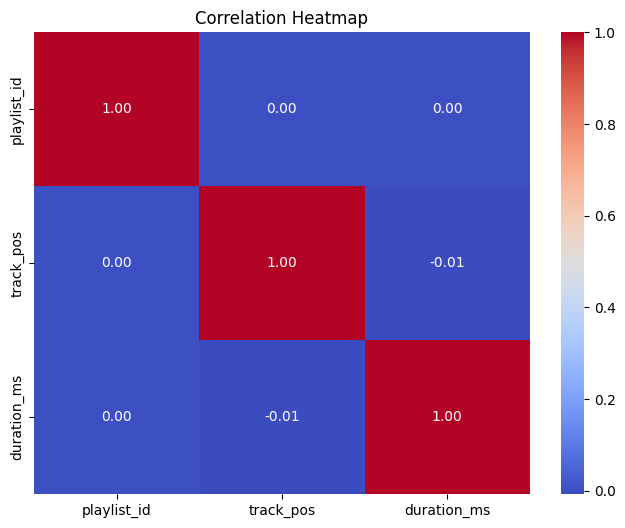

In [ ]:
correlation = df[['playlist_id', 'track_pos', 'duration_ms']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


##Feature Eng

In [ ]:
categorical_columns = ['playlist_name', 'track_name', 'artist_name', 'album_name']


In [ ]:
# Frequency Encoding
for col in categorical_columns:
    freq_encoding = df[col].value_counts().to_dict()
    df[col + '_freq'] = df[col].map(freq_encoding)


In [ ]:
df.to_csv('/content/drive/MyDrive/m.tech_cv_project/processed_chunks/all_playlists_encoded.csv', index=False)


##✅ Why Collaborative Filtering?
Collaborative filtering relies on user-item interactions—like playlists and tracks—to make recommendations. Since your dataset doesn't contain text (e.g., lyrics or track descriptions), and only includes user behavior (which track is in which playlist), collaborative filtering is a strong fit.

In [ ]:
import pandas as pd

# Load the encoded dataset
df = pd.read_csv('/content/drive/MyDrive/m.tech_cv_project/processed_chunks/all_playlists_encoded.csv')
df.head()

,playlist_id,playlist_name,track_pos,track_uri,track_name,artist_name,album_name,duration_ms,duration_min,duration_sec,playlist_name_freq,track_name_freq,artist_name_freq,album_name_freq
0,1000,disney,0,spotify:track:5IbCV9Icebx8rR6wAp5hhP,fathoms below - broadway cast recording,original broadway cast - the little mermaid,the little mermaid: original broadway cast rec...,154506,2.575100,154.506,35174,6,287,365
1,1000,disney,1,spotify:track:6rKVAvjHcxAzZ1BHtwh5yC,daughters of triton - broadway cast recording,original broadway cast - the little mermaid,the little mermaid: original broadway cast rec...,79066,1.317767,79.066,35174,6,287,365
2,1000,disney,2,spotify:track:6Jlkb1Wh08RYHstWScsTvg,the world above - broadway cast recording,original broadway cast - the little mermaid,the little mermaid: original broadway cast rec...,94600,1.576667,94.600,35174,15,287,365
3,1000,disney,3,spotify:track:0XhC8bfStML9ygBmfOt1JJ,human stuff - broadway cast recording,original broadway cast - the little mermaid,the little mermaid: original broadway cast rec...,151480,2.524667,151.480,35174,7,287,365
4,1000,disney,4,spotify:track:0ABxAcsRWlqckkyONsfP67,i want the good times back - broadway cast rec...,original broadway cast - the little mermaid,the little mermaid: original broadway cast rec...,297920,4.965333,297.920,35174,10,287,365


In [ ]:
df.shape

(11124977, 14)

##Smart Sampling Strategies
Create a Stratified Sample (Recommended)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load full dataset
df = pd.read_csv("/content/drive/MyDrive/m.tech_cv_project/processed_chunks/all_playlists_encoded.csv")  # replace with your actual filename


# Set how many rows to take per playlist
N = 3  # You can increase this (e.g., 5 or 10)

# Group by playlist and take up to N rows per playlist
sample_df = df.groupby('playlist_id').apply(lambda x: x.sample(n=min(len(x), N), random_state=42))

# Reset index
sample_df.reset_index(drop=True, inplace=True)

# Check sample size
print("Sample size:", sample_df.shape)

# Save it for further work
sample_df.to_csv("balanced_playlist_sample.csv", index=False)


<ipython-input-2-9a054fc2b3c7>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df = df.groupby('playlist_id').apply(lambda x: x.sample(n=min(len(x), N), random_state=42))


Sample size: (509991, 14)


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'sample_df' is your final dataframe with the stratified sample

# Split the data into train and test sets (80% training, 20% testing)
train_df, test_df = train_test_split(sample_df, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(f"Training data size: {train_df.shape}")
print(f"Testing data size: {test_df.shape}")

# Save the splits for further steps
train_df.to_csv("train_sample.csv", index=False)
test_df.to_csv("test_sample.csv", index=False)


Training data size: (407992, 14)
Testing data size: (101999, 14)


##Prepare Sparse Matrix for Collaborative Filtering

It’s a compressed matrix that represents the relationship between:

Users (in your case: playlist_id)

Items (in your case: track_uri)

Interactions (like listening, liking, adding to playlist)

In [ ]:
from scipy.sparse import coo_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode playlist_id and track_uri as integer indices
playlist_encoder = LabelEncoder()
track_encoder = LabelEncoder()

playlist_ids = playlist_encoder.fit_transform(sample_df['playlist_id'])
track_ids = track_encoder.fit_transform(sample_df['track_uri'])

# Create interaction matrix in sparse format
data = np.ones(len(sample_df))  # assuming binary interaction

interaction_sparse_matrix = coo_matrix(
    (data, (playlist_ids, track_ids))
)

print(interaction_sparse_matrix.shape)
print(f"Sparse matrix density: {interaction_sparse_matrix.nnz / (interaction_sparse_matrix.shape[0] * interaction_sparse_matrix.shape[1]):.6f}")


(169997, 143689)
Sparse matrix density: 0.000021


##Build Recommender with Implicit ALS

In [ ]:
pip install implicit


In [ ]:
import implicit
from scipy.sparse import coo_matrix


In [ ]:
from scipy.sparse import csr_matrix

# ALS requires CSR format
interaction_matrix_csr = interaction_sparse_matrix.tocsr()
(print(interaction_matrix_csr.shape))
print("Matrix shape:", interaction_matrix_csr.shape)
print("Playlist internal ID:", playlist_internal_id)
print(type(playlist_internal_id), playlist_internal_id)



(169997, 143689)
Matrix shape: (169997, 143689)
Playlist internal ID: 0
<class 'numpy.int64'> 0


##Train the ALS Model

In [ ]:
from implicit.als import AlternatingLeastSquares

# Initialize model
model = AlternatingLeastSquares(
    factors=64,  # latent features
    regularization=0.1,
    iterations=20,
    random_state=42
)

# Fit the model
# Note: ALS expects item-user matrix, so we transpose it
model.fit(interaction_sparse_matrix.T)


/usr/local/lib/python3.11/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.03653144836425781 seconds
  warnings.warn(


  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
from collections import defaultdict
import random
from scipy.sparse import lil_matrix

# Ensure reproducibility
random.seed(42)

# Create empty training matrix and holdout dict
train_matrix = lil_matrix(interaction_sparse_matrix.shape)
test_holdout = defaultdict(list)

# Convert the original matrix to LIL for efficient row access
original_matrix = interaction_sparse_matrix.tolil()

# Loop through each user (playlist)
for playlist_id in range(original_matrix.shape[0]):
    track_indices = original_matrix.rows[playlist_id]

    if len(track_indices) > 1:
        # Randomly hold out 1 track
        held_out = random.choice(track_indices)
        test_holdout[playlist_id].append(held_out)

        # All others go to training
        for item in track_indices:
            if item != held_out:
                train_matrix[playlist_id, item] = 1
    else:
        # If only 1 interaction, keep it in training
        for item in track_indices:
            train_matrix[playlist_id, item] = 1

# Convert train matrix to CSR (required for ALS)
train_matrix = train_matrix.tocsr()


In [ ]:
from implicit.als import AlternatingLeastSquares

model = AlternatingLeastSquares(
    factors=64,
    regularization=0.1,
    iterations=20,
    random_state=42
)

model.fit(train_matrix.T)  # Transpose is required


/usr/local/lib/python3.11/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.009146928787231445 seconds
  warnings.warn(


  0%|          | 0/20 [00:00<?, ?it/s]

##Make Recommendations

In [ ]:
from scipy.sparse import csr_matrix

# Convert the sparse matrix to CSR format if not already
interaction_matrix_csr = interaction_sparse_matrix.tocsr()

# Pick a playlist (user) internal ID for recommendation
# For example, pick a random playlist
playlist_id = sample_df['playlist_id'].iloc[0]
playlist_internal_id = int(playlist_encoder.transform([playlist_id])[0])

# Get top-N recommendations
N = 10
recommendations = model.recommend(
    userid=playlist_internal_id,
    user_items=interaction_matrix_csr,
    N=N,
    filter_already_liked_items=True
)

# Decode track indices back to original URIs
recommended_track_ids = [track_encoder.inverse_transform([track_id])[0] for track_id, _ in recommendations]

print("Recommendations for playlist:", playlist_id)
print(recommended_track_ids)


ValueError: user_items must contain 1 row for every user in userids

In [ ]:
import re

# Check if all URIs match Spotify's format
valid_uris = df['track_uri'].str.match(r'^spotify:track:[a-zA-Z0-9]{22}$')
invalid_uris = df[~valid_uris]

print(f"Invalid URIs found: {len(invalid_uris)}")
print(invalid_uris[['track_uri']].head() if len(invalid_uris) > 0 else "All URIs are valid!")

Invalid URIs found: 0
All URIs are valid!


Prepare Data in Chunks

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import lil_matrix, csr_matrix
from sklearn.preprocessing import LabelEncoder

# Load data in chunks
chunk_size = 100000  # Adjust based on your RAM
playlist_encoder = LabelEncoder()
track_encoder = LabelEncoder()

# First pass: Fit encoders to *all* unique IDs
all_playlist_ids = []
all_track_uris = []
for chunk in pd.read_csv('/content/drive/MyDrive/m.tech_cv_project/processed_chunks/all_playlists_encoded.csv', chunksize=chunk_size):
    all_playlist_ids.extend(chunk['playlist_id'].unique())
    all_track_uris.extend(chunk['track_uri'].unique())

# Fit encoders on all unique values
playlist_encoder.fit(all_playlist_ids)
track_encoder.fit(all_track_uris)

# Get dimensions
n_playlists = len(playlist_encoder.classes_)
n_tracks = len(track_encoder.classes_)

## Build Sparse Matrix in Chunks

In [ ]:
# Initialize LIL matrix (efficient for incremental building)
interaction_sparse = lil_matrix((n_playlists, n_tracks), dtype=np.int8)

for chunk in pd.read_csv('/content/drive/MyDrive/m.tech_cv_project/processed_chunks/all_playlists_encoded.csv', chunksize=chunk_size):
    # Encode IDs to numerical indices
    playlist_indices = playlist_encoder.transform(chunk['playlist_id'])
    track_indices = track_encoder.transform(chunk['track_uri'])

    # Fill matrix (1 = interaction exists)
    for pl_idx, tr_idx in zip(playlist_indices, track_indices):
        interaction_sparse[pl_idx, tr_idx] = 1

# Convert to CSR format (optimized for arithmetic)
interaction_csr = interaction_sparse.tocsr()
print(f"Final matrix shape: {interaction_csr.shape} (Playlists × Tracks)")
print(f"Non-zero entries: {interaction_csr.nnz}")

Final matrix shape: (169997, 909666) (Playlists × Tracks)
Non-zero entries: 10977462


##Train-Test Split (Sparse-Friendly)

In [ ]:
from sklearn.model_selection import train_test_split

# Split playlists (not individual interactions)
playlist_indices = np.arange(n_playlists)
train_pl, test_pl = train_test_split(playlist_indices, test_size=0.2)

# Create train/test matrices
train_matrix = interaction_csr[train_pl]
test_matrix = interaction_csr[test_pl]

##Train ALS Model

In [ ]:
!pip install implicit
import implicit

# Transpose for item-user format (required by implicit)
item_user_train = train_matrix.T.tocsr()

# Train ALS
model = implicit.als.AlternatingLeastSquares(
    factors=64,
    iterations=15,
    regularization=0.05,
    random_state=42
)
model.fit(item_user_train)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 61.3 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 64 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()


  0%|          | 0/15 [00:00<?, ?it/s]

##Evaluation Metrics


In [ ]:
def evaluate_chunked_simple(model, train_matrix, test_matrix, k=5, chunk_size=1000):
    precisions = []

    # Create mapping from test matrix positions to train matrix indices
    # This assumes test_matrix contains a subset of playlists from train_matrix
    train_playlist_indices = set(range(train_matrix.shape[0]))

    for i in range(0, test_matrix.shape[0], chunk_size):
        chunk = test_matrix[i:i+chunk_size]

        recommendations = []
        for j in range(chunk.shape[0]):
            # Get the corresponding train matrix index
            test_pos = i + j
            if test_pos < train_matrix.shape[0]:  # Only evaluate playlists that exist in training
                try:
                    rec = model.recommend(
                        userid=test_pos,  # Use original training index
                        user_items=chunk[j],  # Current test playlist data
                        N=k,
                        filter_already_liked_items=True
                    )
                    recommendations.append(rec)
                except:
                    recommendations.append(([], []))  # Empty recommendation if error
            else:
                recommendations.append(([], []))  # Skip playlists not in training

        # Calculate precision
        for j, (items, scores) in enumerate(recommendations):
            if len(items) > 0:
                true_positives = len(set(items) & set(chunk[j].indices))
                precisions.append(true_positives / k)

    return np.mean(precisions) #if precisions else 0.0

# Usage
print(f"Precision@5: {evaluate_chunked_simple(model, train_matrix, test_matrix):.3f}")

##Hyperparameter Tuning (Optional)

In [ ]:
# Example: Grid search for best factors
best_score = 0
best_factors = 0

for factors in [32, 64, 128]:
    model = implicit.als.AlternatingLeastSquares(factors=factors)
    model.fit(item_user_train)
    score = np.mean([precision_at_k(model, idx) for idx in range(10)])  # Evaluate on subset
    if score > best_score:
        best_score = score
        best_factors = factors

print(f"Best factors: {best_factors} (Precision@5: {best_score:.3f})")